In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.chdir("C:/Users/ASUS/Desktop/Python Course/Datasets")
dataset = pd.read_csv('Hotel_Reviews1.csv')

In [3]:
dataset.head()

,Hotel_Address,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7


In [4]:
dataset.describe()

,Reviewer_Score
count,515738.000000
mean,8.395077
std,1.637856
min,2.500000
25%,7.500000
50%,8.800000
75%,9.600000
max,10.000000


In [5]:
import re #Regular expression library for strings and such

In [6]:
import nltk #Natural Language toolkit

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
alphadata = dataset["Negative_Review"]+ dataset["Positive_Review"]
alphadata[0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [9]:
for i in range (0,1000):
    review = alphadata[i]
    review=re.sub('[^a-zA-Z]',' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [10]:
data[:8]

['angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room nd floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer park outsid hotel beauti',
 'neg real complaint hotel gr

In [11]:
data

['angri made post avail via possibl site use plane trip one make mistak book place made book via book com stay night hotel juli upon arriv place small room nd floor hotel turn room book special reserv level duplex room would big window high ceil room ok mind broken window close hello rain mini fridg contain sort bio weapon least guess smell intim ask chang room explain time book duplex btw cost simpl doubl got way volum due high ceil offer room next day check next day clock order get room wane best way begin holiday wait till order check new room wonder waist time room got want peac intern garden view big window tire wait room place belong rush citi even turn constant nois room guess made vibrat vent tube someth constant annoy hell stop even make hard fall asleep wife audio record attach want send via e mail next day technician came abl determin caus disturb sound offer chang room hotel fulli book room left one smaller seem newer park outsid hotel beauti',
 'neg real complaint hotel gr

Feature engineering (Make data in numeric format)
So we tokenize i guess

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(data).toarray()
y=dataset.iloc[:1000,-1].values
y

array([ 2.9,  7.5,  7.1,  3.8,  6.7,  6.7,  4.6, 10. ,  6.5,  7.9, 10. ,
        5.8,  4.6,  9.2,  8.8, 10. ,  6.3,  7.5,  7.1,  7.5,  6.3,  3.8,
        5.4,  9.6,  9.6,  8.3,  9.6,  8.3,  8.3,  9.2,  9.2,  7.1,  4.2,
        6.7,  7.9,  8.3,  7.1,  8.8,  8.8,  6.3,  7.5,  6.7,  2.9,  9.6,
        3.3,  7.9,  4.2,  8.3, 10. ,  5.4,  9.6,  7.1, 10. , 10. ,  7.9,
       10. ,  7.1,  7.9,  7.9,  9.6,  4.6,  7.1,  8.3,  6.3,  9.2,  8.8,
        9.2,  7.5,  7.9,  8.8,  6.7,  7.1,  7.1,  6.3,  7.1, 10. ,  7.1,
        7.5,  9.2,  9.2,  5.4, 10. ,  5.8,  9.2,  7.9, 10. ,  7.5,  5.8,
        5.8,  7.5,  4.2,  7.1,  5. ,  4.2,  6.7,  9.6, 10. ,  8.8,  5. ,
        6.3,  5. ,  4.6,  8.8,  9.2,  7.9, 10. ,  7.1,  3.8,  9.6,  8.8,
        7.9,  6.3, 10. ,  9.6,  8.8,  7.1,  9.2,  8.8,  7.9,  7.5,  4.6,
        8.3,  4.2,  7.5,  4.6,  7.5,  5.8,  9.2,  8.8,  7.9,  7.9,  8.3,
        7.1, 10. ,  4.6,  9.6, 10. ,  9.2,  6.3,  6.7, 10. , 10. ,  8.3,
        5.4,  8.8,  9.6,  2.5,  5.4,  7.9,  9.2,  6

In [13]:
temp = []
for da in y:
    if da >=5.0:
        da = 1
    else:
        da = 0
    temp.append(da)
temp

[0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
y = temp

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential()

model.add(Dense(output_dim = 6, init='uniform', activation = 'relu', input_dim = 1500))
model.add(Dense(output_dim = 6, init='uniform', activation = 'relu',input_dim = 1500))
model.add(Dense(output_dim = 6, init='uniform', activation = 'relu',input_dim = 1500))

model.add(Dense(output_dim = 1, init='uniform', activation = 'sigmoid'))

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1500, units=6, kernel_initializer="uniform")`
  """
C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  import sys


In [17]:
import tensorflow as tf
model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train, batch_size = 32, epochs = 30)

Epoch 1/30
800/800 [==============================] - 1s 770us/step - loss: 0.6695 - accuracy: 0.9262
Epoch 2/30
800/800 [==============================] - 0s 55us/step - loss: 0.6240 - accuracy: 0.9525
Epoch 3/30
800/800 [==============================] - 0s 60us/step - loss: 0.5839 - accuracy: 0.9525
Epoch 4/30
800/800 [==============================] - 0s 57us/step - loss: 0.5484 - accuracy: 0.9525
Epoch 5/30
800/800 [==============================] - 0s 58us/step - loss: 0.5169 - accuracy: 0.9525
Epoch 6/30
800/800 [==============================] - 0s 58us/step - loss: 0.4890 - accuracy: 0.9525
Epoch 7/30
800/800 [==============================] - 0s 58us/step - loss: 0.4642 - accuracy: 0.9525
Epoch 8/30
800/800 [==============================] - 0s 60us/step - loss: 0.4420 - accuracy: 0.9525
Epoch 9/30
800/800 [==============================] - 0s 54us/step - loss: 0.4222 - accuracy: 0.9525
Epoch 10/30
800/800 [==============================] - 0s 54us/step - loss: 0.4045 - accur

In [24]:
y_pred = model.predict(X_test)
y_pred

array([[0.84374005],
       [0.84373605],
       [0.84373677],
       [0.84373665],
       [0.8437364 ],
       [0.8437368 ],
       [0.84373236],
       [0.84373754],
       [0.84373665],
       [0.84373766],
       [0.843735  ],
       [0.8437101 ],
       [0.84373575],
       [0.84373623],
       [0.84373325],
       [0.84373546],
       [0.84373266],
       [0.84373623],
       [0.8437392 ],
       [0.84373254],
       [0.84373766],
       [0.84373206],
       [0.8437388 ],
       [0.84373695],
       [0.8437365 ],
       [0.8437346 ],
       [0.843735  ],
       [0.8437316 ],
       [0.84373736],
       [0.84373665],
       [0.84373397],
       [0.8437337 ],
       [0.8437364 ],
       [0.8437368 ],
       [0.8437304 ],
       [0.84373623],
       [0.8437368 ],
       [0.8437344 ],
       [0.8437352 ],
       [0.843739  ],
       [0.84373826],
       [0.84373575],
       [0.8437393 ],
       [0.84373665],
       [0.84373236],
       [0.8437332 ],
       [0.84373534],
       [0.843

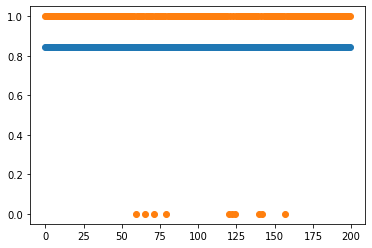

In [23]:
plt.plot(y_pred,'o')
plt.plot(y_test,'o')
plt.show()